# WeatherPy

## Observations
1. Of all the metrics compared with latitude, the only one that shows a linear relationship is the max temperature for
each city when split into southern and northern hemispheres. Generally a city's temperature will be colder the further it
moves away from the equator.
2. While not showing a linear relationship, there was a cluster of data points in the southern hemisphere between the
humidity and latitude where latitudes closer to the equator showed a higher humidity. Further analysis could lead to finding
why the southern hemisphere shows a stronger relationship between latitude and humidity than the northern hemisphere.
3. There was also a cluster in the wind speed data for the northern hemisphere showing a range between 0-10 mph
for most latitudes. Further analysis could lead to finding a trend why there is a more consistent range of wind speeds in
the northern hemisphere.

## Project Work

In [1]:
# Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import linregress

# Contains python code for data pull
import weatherpy

In [2]:
city_list = weatherpy.generate_city_list()

In [3]:
weather_data = weatherpy.get_weather_data(city_list)

Data Retrieval Start
_________________________
Processing Record 1 of Set 1 | lebu
Processing Record 2 of Set 1 | volksrust
Processing Record 3 of Set 1 | mahebourg
Processing Record 4 of Set 1 | najran
Processing Record 5 of Set 1 | ponta delgada
Processing Record 6 of Set 1 | naryan-mar
Processing Record 7 of Set 1 | georgetown
Processing Record 8 of Set 1 | punta arenas
Processing Record 9 of Set 1 | port hardy
Processing Record 10 of Set 1 | upernavik
Processing Record 11 of Set 1 | port alfred
Processing Record 12 of Set 1 | vardo
Processing Record 13 of Set 1 | husavik
Processing Record 14 of Set 1 | dwarka
Processing Record 15 of Set 1 | sorland
Processing Record 16 of Set 1 | yellowknife
Processing Record 17 of Set 1 | rikitea
City not found. Skipping...
Processing Record 18 of Set 1 | znamenskoye
Processing Record 19 of Set 1 | qaqortoq
Processing Record 20 of Set 1 | guanica
Processing Record 21 of Set 1 | gimli
Processing Record 22 of Set 1 | tuktoyaktuk
Processing Record 23

In [53]:
weather_df = pd.DataFrame(weather_data)
weather_df.head()

# export dataframe to csv
weather_df.to_csv(weatherpy.output_data_file, index=False)

In [22]:
weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,lebu,-37.6167,-73.6500,60.33,75,0,13.11,CL,1619372622
1,volksrust,-27.3654,29.8818,52.39,49,0,2.13,ZA,1619372667
2,mahebourg,-20.4081,57.7000,77.00,88,75,12.66,MU,1619372245
3,najran,17.4924,44.1277,78.80,38,75,11.50,SA,1619372415
4,ponta delgada,37.7333,-25.6667,62.60,67,40,13.80,PT,1619372667


## Data Analysis

### Temperature (F) vs. Latitude

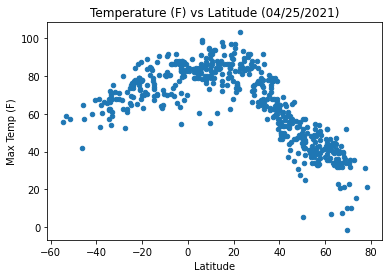

In [21]:
weather_df.plot(kind='scatter', x='Lat', y='Max Temp')
plt.rcParams['figure.facecolor'] = 'white'
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
plt.title('Temperature (F) vs Latitude (04/25/2021)')
plt.savefig('../output_figures/Temperature_vs_Lat.png')
plt.show()

This graph is analyzing the relationship between the city's latitude and the max temperature for the recorded date
measured in degrees Fahrenheit. In this graph it appears that there is a somewhat parabolic relationship between
latitude and the max temperature where the maximum temperature is around the equator at 0 latitude.


### Humidity (%) vs Latitude

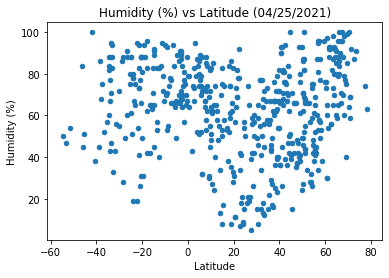

In [23]:
weather_df.plot(kind='scatter', x='Lat', y='Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Humidity (%) vs Latitude (04/25/2021)')
plt.savefig('../output_figures/Humidity_vs_Lat.png')
plt.show()

This graph is analyzing the relationship between the city's latitude and the humidity percentage for the recorded date.
While there appears that there is not a relationship between the two,  the Humidity values do seem to trend above 50%
for most locations.

### Cloudiness (%) vs Latitude

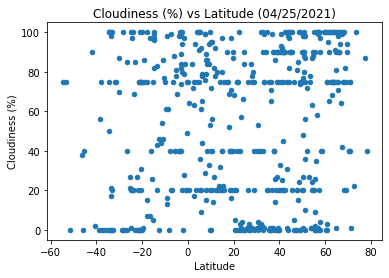

In [26]:
weather_df.plot(kind='scatter', x='Lat', y='Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Cloudiness (%) vs Latitude (04/25/2021)')
plt.savefig('../output_figures/Cloudiness_vs_Lat.png')
plt.show()

This graph is analyzing the relationship between the city's latitude and the percentage of cloud cover in the sky for
the recorded date. There does not appear to be a relationship. On the graph multiples of 20 seem clustered, but this may
be how this data point is more likely to be reported.

### Wind Speed (mph) vs Latitude

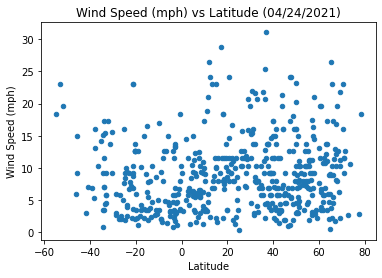

In [25]:
weather_df.plot(kind='scatter', x='Lat', y='Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Wind Speed (mph) vs Latitude (04/24/2021)')
plt.savefig('../output_figures/WindSpeed_vs_Lat.png')
plt.show()

This graph is analyzing the relationship between the city's latitude and the wind speeds in mph. The results don't show much
correlation, but do appear somewhat flat for wind speeds of 10 miles per hour and below.

In [10]:
nh_weather_df = weather_df.loc[weather_df['Lat'] >= 0]
sh_weather_df = weather_df.loc[weather_df['Lat'] < 0]

## Data Analysis by Hemisphere

## Temperature

r-value: -0.8871710958721992
r-squared value: 0.787072553351079


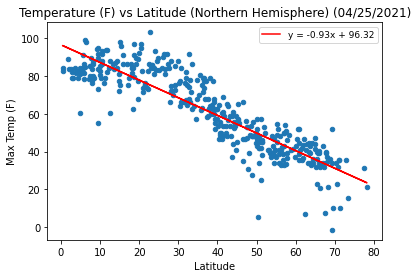

In [44]:
# Northern Hemisphere

lat = nh_weather_df['Lat']
temp = nh_weather_df['Max Temp']

# get regression values
(slope, intercept, rvalue, pvalue, stderr) = linregress(lat, temp)
regress_values = lat * slope + intercept
line_eq = 'y = ' + str(round(slope, 2)) + 'x + ' + str(round(intercept, 2))

print(f'r-value: {rvalue}')
print(f'r-squared value: {rvalue ** 2}')

nh_weather_df.plot(kind='scatter', x='Lat', y='Max Temp')
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
plt.title('Temperature (F) vs Latitude (Northern Hemisphere) (04/25/2021)')
plt.plot(lat, regress_values, 'r-', label = line_eq)
plt.legend(fontsize = 9)
plt.savefig('../output_figures/Temperature_vs_Lat_NorthernHemisphere.png')
plt.show()

r-value: 0.6534950187976777
r-squared value: 0.4270557395933771


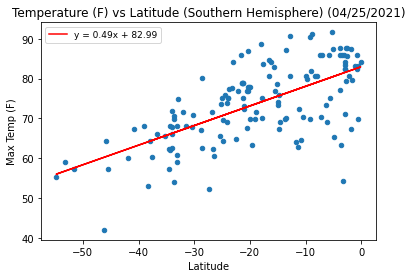

In [46]:
# Southern Hempisphere

lat = sh_weather_df['Lat']
temp = sh_weather_df['Max Temp']

# get regression values
(slope, intercept, rvalue, pvalue, stderr) = linregress(lat, temp)
regress_values = lat * slope + intercept
line_eq = 'y = ' + str(round(slope, 2)) + 'x + ' + str(round(intercept, 2))

print(f'r-value: {rvalue}')
print(f'r-squared value: {rvalue ** 2}')

sh_weather_df.plot(kind='scatter', x='Lat', y='Max Temp')
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
plt.title('Temperature (F) vs Latitude (Southern Hemisphere) (04/25/2021)')
plt.plot(lat, regress_values, 'r-', label = line_eq)
plt.legend(fontsize = 9)
plt.savefig('../output_figures/Temperature_vs_Lat_SouthernHemisphere.png')
plt.show()

There is a negative relationship between the latitude and the max temperature in the northern hemisphere. The hottest locations are closest
to the equator with an estimated temperature of 96.32 degrees Fahrenheit, and then the temperature is estimated to drop
 0.93 degrees Fahrenheit for each degree of latitude to the north of the equator. With an r-squared value of 0.78
there is a pretty strong relationship between latitude and temperature.

There is a positive relationship between the latitude and the max temperature in the southern hemisphere.
The hottest locations are closest to the equator with an estimated temperature of 82.99 degrees Fahrenheit, and then
the temperature is estimated to drop 0.49 degrees Fahrenheit for each degree of latitude to the south of the equator.
With an r-squared value of 0.42 this projection for temperature and latitude appears unreliable southern.


### Humidity

r-value: 0.21076889736333806
r-squared value: 0.044423528095757336


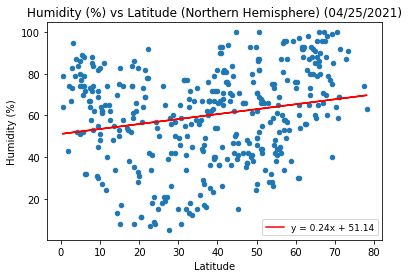

In [47]:
lat = nh_weather_df['Lat']
humidity = nh_weather_df['Humidity']

# get regression values
(slope, intercept, rvalue, pvalue, stderr) = linregress(lat, humidity)
regress_values = lat * slope + intercept
line_eq = 'y = ' + str(round(slope, 2)) + 'x + ' + str(round(intercept, 2))

print(f'r-value: {rvalue}')
print(f'r-squared value: {rvalue ** 2}')

nh_weather_df.plot(kind='scatter', x='Lat', y='Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Humidity (%) vs Latitude (Northern Hemisphere) (04/25/2021)')
plt.plot(lat, regress_values, 'r-', label = line_eq)
plt.legend(fontsize = 9)
plt.savefig('../output_figures/Humidity_vs_Lat_NorthernHemisphere.png')
plt.show()

r-value: 0.20098552411325354
r-squared value: 0.040395180903079225


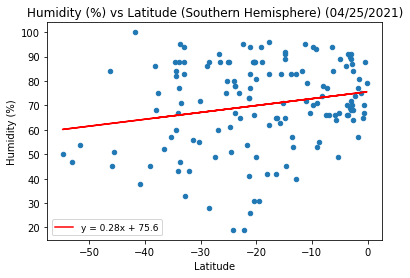

In [48]:
lat = sh_weather_df['Lat']
humidity = sh_weather_df['Humidity']

# get regression values
(slope, intercept, rvalue, pvalue, stderr) = linregress(lat, humidity)
regress_values = lat * slope + intercept
line_eq = 'y = ' + str(round(slope, 2)) + 'x + ' + str(round(intercept, 2))

print(f'r-value: {rvalue}')
print(f'r-squared value: {rvalue ** 2}')

sh_weather_df.plot(kind='scatter', x='Lat', y='Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Humidity (%) vs Latitude (Southern Hemisphere) (04/25/2021)')
plt.plot(lat, regress_values, 'r-', label = line_eq)
plt.legend(fontsize = 9)
plt.savefig('../output_figures/Humidity_vs_Lat_SouthernHemisphere.png')
plt.show()

Nether of there plots show a strong linear relationship for humidity and the latitude of the city. The northern
hemisphere graph is widely distributed across all humidity values and latitude value, but the southern hemisphere data
appears to be more clustered in the 50% - 100% humidity range.


### Cloudiness

r-value: 0.134309467890572
r-squared value: 0.01803903316504859


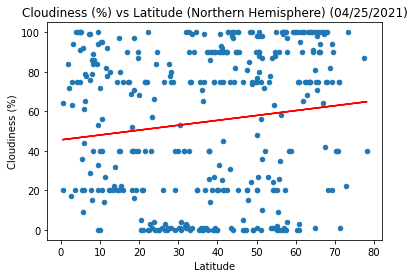

In [40]:
lat = nh_weather_df['Lat']
cloudiness = nh_weather_df['Cloudiness']

# get regression values
(slope, intercept, rvalue, pvalue, stderr) = linregress(lat, cloudiness)
regress_values = lat * slope + intercept
line_eq = 'y = ' + str(round(slope, 2)) + 'x + ' + str(round(intercept, 2))

print(f'r-value: {rvalue}')
print(f'r-squared value: {rvalue ** 2}')

nh_weather_df.plot(kind='scatter', x='Lat', y='Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Cloudiness (%) vs Latitude (Northern Hemisphere) (04/25/2021)')
plt.plot(lat, regress_values, 'r-')
plt.savefig('../output_figures/Cloudiness_vs_Lat_NorthernHemisphere.png')
plt.show()

r-value: 0.20069363054733524
r-squared value: 0.0402779333422703


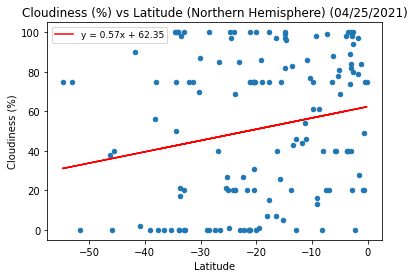

In [49]:
lat = sh_weather_df['Lat']
cloudiness = sh_weather_df['Cloudiness']

# get regression values
(slope, intercept, rvalue, pvalue, stderr) = linregress(lat, cloudiness)
regress_values = lat * slope + intercept
line_eq = 'y = ' + str(round(slope, 2)) + 'x + ' + str(round(intercept, 2))

print(f'r-value: {rvalue}')
print(f'r-squared value: {rvalue ** 2}')


sh_weather_df.plot(kind='scatter', x='Lat', y='Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Cloudiness (%) vs Latitude (Northern Hemisphere) (04/25/2021)')
plt.plot(lat, regress_values, 'r-', label = line_eq)
plt.legend(fontsize = 9)
plt.savefig('../output_figures/Cloudiness_vs_Lat_SouthernHemisphere.png')
plt.show()

Cloudiness shows no linear relationship with latitude. Both the northern and southern hemispheres have a low r-squared
value and almost no clustering.

### Wind Speed (mph) vs Latitude

r-value: 0.06341971144736515
r-squared value: 0.004022059800067058


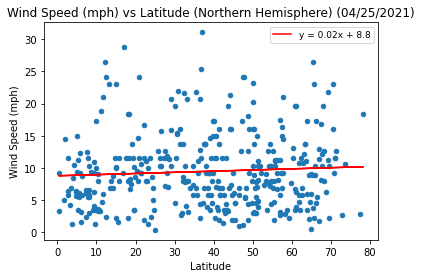

In [50]:
lat = nh_weather_df['Lat']
wind_speed = nh_weather_df['Wind Speed']

# get regression values
(slope, intercept, rvalue, pvalue, stderr) = linregress(lat, wind_speed)
regress_values = lat * slope + intercept
line_eq = 'y = ' + str(round(slope, 2)) + 'x + ' + str(round(intercept, 2))

print(f'r-value: {rvalue}')
print(f'r-squared value: {rvalue ** 2}')

nh_weather_df.plot(kind='scatter', x='Lat', y='Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Wind Speed (mph) vs Latitude (Northern Hemisphere) (04/25/2021)')
plt.plot(lat, regress_values, 'r-', label = line_eq)
plt.legend(fontsize = 9)
plt.savefig('../output_figures/WindSpeed_vs_Lat_NorthernHemisphere.png')
plt.show()

r-value: -0.2918227045846554
r-squared value: 0.08516049091110307


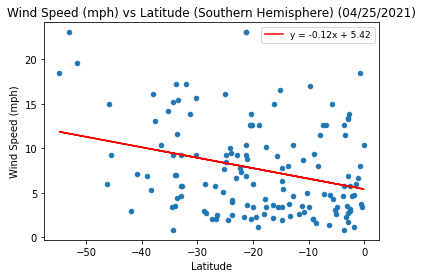

In [52]:
lat = sh_weather_df['Lat']
wind_speed = sh_weather_df['Wind Speed']

# get regression values
(slope, intercept, rvalue, pvalue, stderr) = linregress(lat, wind_speed)
regress_values = lat * slope + intercept
line_eq = 'y = ' + str(round(slope, 2)) + 'x + ' + str(round(intercept, 2))

print(f'r-value: {rvalue}')
print(f'r-squared value: {rvalue ** 2}')

sh_weather_df.plot(kind='scatter', x='Lat', y='Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Wind Speed (mph) vs Latitude (Southern Hemisphere) (04/25/2021)')
plt.plot(lat, regress_values, 'r-', label = line_eq)
plt.legend(fontsize = 9)
plt.savefig('../output_figures/WindSpeed_vs_Lat_SouthernHemisphere.png')
plt.show()

There does not appear to be a linear relationship between the wind speed and latitude for either the northern hemisphere
or the southern hemisphere. The wind speed's in the northern hemisphere do appear to be clustered below 10 mph for
all latitudes.